In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

df = pd.read_csv('diabetes.csv')
df.head()

lr = LogisticRegression()

data = df.drop(["Outcome"], axis=1)
target = df["Outcome"]

# lr.fit(data)

data = StandardScaler().fit_transform(data)
data = MinMaxScaler().fit_transform(data)

def get_accuracy(cl):
    dtr, dts, ttr, tts = train_test_split(data, target)
    cl.fit(dtr, ttr)
    a = accuracy_score(tts, cl.predict(dts))
    print(a)

get_accuracy(lr)
    
# df.hist()
# plt.show()

0.7708333333333334


In [48]:
dtr, dts, ttr, tts = train_test_split(data, target)
lr.fit(dtr, ttr)
confusion_matrix(tts, lr.predict(dts))


array([[108,  19],
       [ 33,  32]])

In [49]:
from sklearn.metrics import precision_score, recall_score

precision_score(tts, lr.predict(dts))

0.6274509803921569

In [50]:
recall_score(tts, lr.predict(dts))

0.49230769230769234

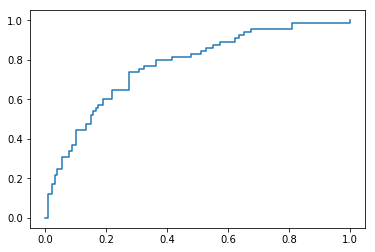

In [51]:
# lr.decision_function(tts)

from sklearn.metrics import roc_auc_score, roc_curve

a, b, _ = roc_curve(tts, lr.decision_function(dts))
plt.plot(a, b)
plt.show()

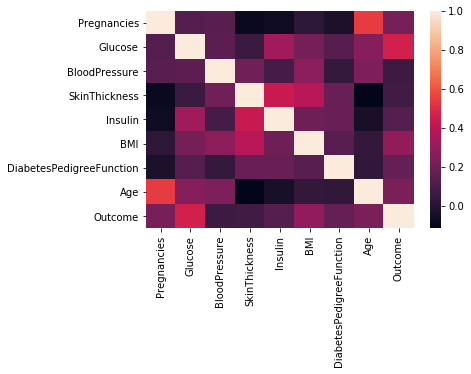

In [59]:
from sklearn.model_selection import KFold

# kf = KFold(n_splits=5, shuffle=True)

# def precision(cl):
#     acc = []
#     for tr, ts in kf.split(data):
#         cl.fit(data[tr], target.velues[tr])
#         acc.append(accuracy_score(target.velues[ts]), cl.predict(data.values[ts]))
#     return np.mean(acc)
        
# precision(lr)

# !pip install seaborn
import seaborn as sns

sns.heatmap(df.corr())